In [ ]:
from google.colab import files
uploaded = files.upload()


Saving job_prediction_dataset_v2.csv to job_prediction_dataset_v2 (1).csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('job_prediction_dataset_v2 (1).csv')

# Show first 5 rows
df.head()

,ID,Degree,Field,Skills,Experience,Industry,Job_Role
0,1,B.Tech,Statistics,"Data Analysis, R, Statistics",2,IT,Data Analyst
1,2,BCA,Marketing,"Power BI, Excel, Tableau",2,IT,Data Analyst
2,3,B.Sc,Marketing,"Power BI, Excel, Tableau",2,Data Science,Data Analyst
3,4,B.Tech,Statistics,"Power BI, Excel, Tableau",3,IT,Data Analyst
4,5,B.Tech,IT,"Python, SQL, Excel",1,IT,Data Analyst


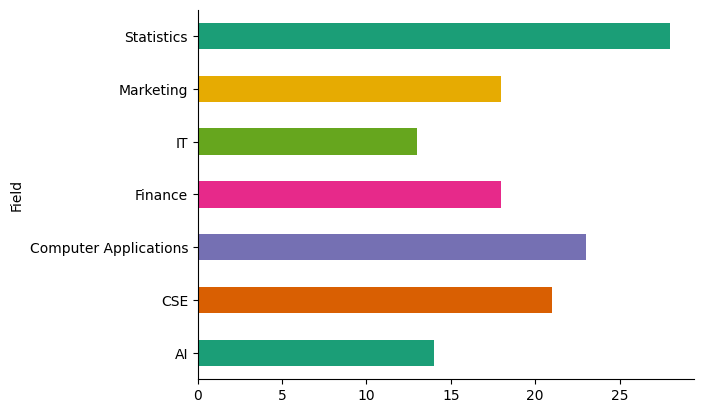

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Field').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

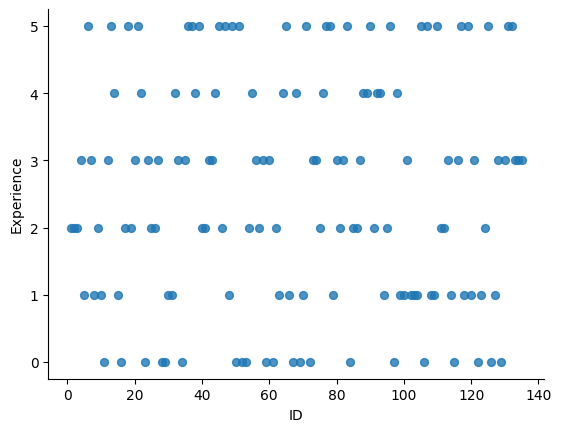

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ID', y='Experience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1YRGboBhFpvIA11Z-bL20UyRV3A2FcOirzpZZ_Lt_enI/edit#gid=0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/100emVzf0Fp9I_iWC2_q0VIQ0FrOeeERbNp-ia2Nn2kE/edit#gid=0


from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

In [6]:
# ===============================================================
# AI JOB PREDICTION SYSTEM – HIGH ACCURACY VERSION (Final Fix)
# ===============================================================

# Step 1️⃣ : Import Libraries
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 2️⃣ : Upload the improved dataset
print("📂 Please upload your job_prediction_dataset_v2.csv file")
uploaded = files.upload()

# Step 3️⃣ : Load dataset
df = pd.read_csv('ai_job_prediction_dataset.csv') # Corrected filename based on previous error
print("\n✅ Dataset Loaded Successfully!\n")
print(df.head())

# Step 4️⃣ : Split features and target (Updated column names to match the dataset)
X = df[['CGPA', 'Communication', 'Technical_Skills', 'Internship', 'Projects', 'Coding_Skills', 'Domain']]
y = df['Job_Role']

# Step 5️⃣ : Define preprocessing (One-Hot Encode categorical columns) (Updated column names)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Domain']) # 'Domain' is the categorical feature
    ],
    remainder='passthrough'  # keeps numerical columns: CGPA, Communication, Technical_Skills, Internship, Projects, Coding_Skills
)

# Step 6️⃣ : Create ML pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42))
])

# Step 7️⃣ : Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8️⃣ : Train model
model.fit(X_train, y_train)

# Step 9️⃣ : Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {acc*100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Step 🔟 : Predict for new candidate (Updated column names and example values)
new_candidate = pd.DataFrame({
    'CGPA': [8.5],
    'Communication': [8],
    'Technical_Skills': [9],
    'Internship': [1],
    'Projects': [3],
    'Coding_Skills': [9],
    'Domain': ['Cloud']
})

predicted_job = model.predict(new_candidate)
print("\n💼 Predicted Job Role for new candidate:", predicted_job[0])
print("\n✅ AI Job Prediction System Executed Successfully!")

📂 Please upload your job_prediction_dataset_v2.csv file


Saving ai_job_prediction_dataset.csv to ai_job_prediction_dataset (3).csv

✅ Dataset Loaded Successfully!

   CGPA  Communication  Technical_Skills  Internship  Projects  Coding_Skills  \
0  7.50              7                 7           1         2             10   
1  9.80              5                10           0         3              8   
2  8.93              6                 9           1         6              8   
3  8.39              5                 9           1         5              7   
4  6.62              9                10           0         5              7   

          Domain          Job_Role  
0  Cybersecurity  Security Analyst  
1  Cybersecurity  Security Analyst  
2  Cybersecurity  Security Analyst  
3          Cloud    Cloud Engineer  
4             ML       ML Engineer  

🎯 Model Accuracy: 100.00%

📊 Classification Report:
                   precision    recall  f1-score   support

     AI Engineer       1.00      1.00      1.00         6
  Cloud Engin